In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
team_data = pd.read_csv('data/nhl_standings.csv')

In [7]:
team_data['GD per game'] = (team_data['GF'] - team_data['GA']) / team_data['GP']

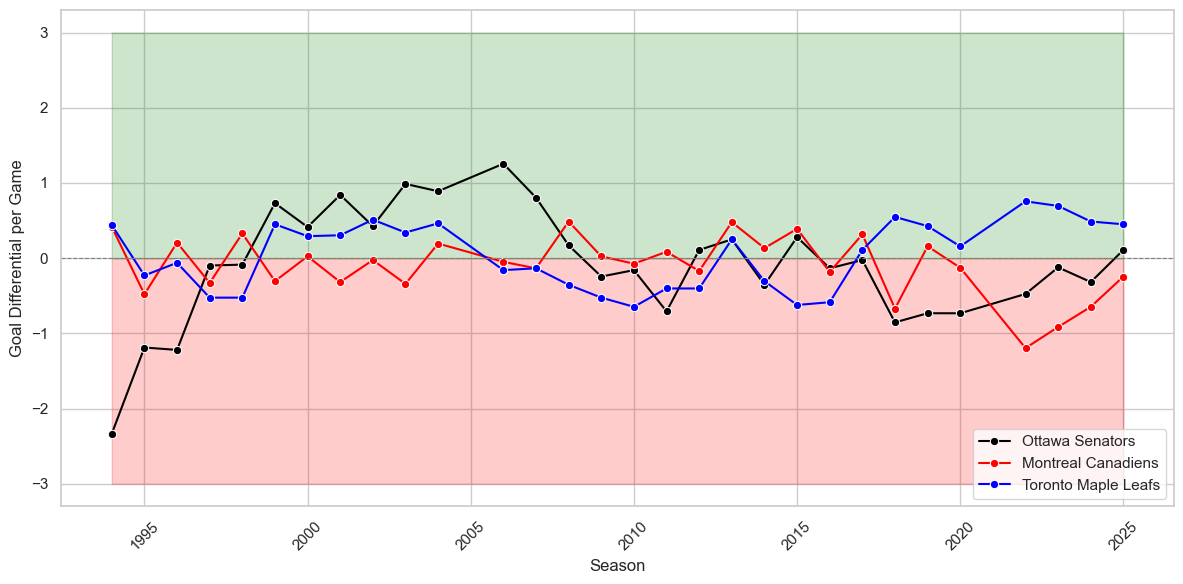

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=team_data[team_data['team']=='Ottawa Senators'], 
             x='season', y='GD per game', marker='o', color='black', label='Ottawa Senators')
sns.lineplot(data=team_data[team_data['team']=='Montreal Canadiens'],
             x='season', y='GD per game', marker='o', color='red', label='Montreal Canadiens')
sns.lineplot(data=team_data[team_data['team']=='Toronto Maple Leafs'],
             x='season', y='GD per game', marker='o', color='blue', label='Toronto Maple Leafs')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.fill_between(team_data['season'], -3, 0, color='red', alpha=0.2)
plt.fill_between(team_data['season'], 0, 3, color='green', alpha=0.2)
plt.xlabel('Season')
plt.ylabel('Goal Differential per Game')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()